In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (ÏÑúÏö∏ ÎåÄÍ∏∞ Ïò§Ïóº 2019)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïúÍ∏Ä ÏãúÍ∞ÅÌôîÏö©)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_excel('ÏÑúÏö∏ÎåÄÍ∏∞Ïò§Ïóº_2019.xlsx')

# 2. Ïª¨Îüº Ï†ïÎ¶¨
df.columns = ['ÎÇ†Ïßú', 'Ï∏°Ï†ïÏÜåÎ™Ö', 'ÎØ∏ÏÑ∏Î®ºÏßÄ', 'Ï¥àÎØ∏ÏÑ∏Î®ºÏßÄ', 'Ïò§Ï°¥', 'Ïù¥ÏÇ∞ÌôîÏßàÏÜå', 'ÏùºÏÇ∞ÌôîÌÉÑÏÜå', 'ÏïÑÌô©ÏÇ∞Í∞ÄÏä§']

# 3. ÎÇ†Ïßú Ï†ïÏ†ú
df = df[pd.to_datetime(df['ÎÇ†Ïßú'], errors='coerce').notnull()]
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])


/tmp/ipykernel_72637/1151047574.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df['ÎÇ†Ïßú'], errors='coerce').notnull()]


In [ ]:
# Í≤∞Ï∏°ÏπòÏóê ÎåÄÌïú ÌèâÍ∑† Í∞í Í≤ÄÏ¶ù

# Í≤ÄÏ¶ù ÔºëÎ≤à„ÄÅ Í∞Å ÎÇ†ÏßúÎ≥Ñ Ï∏°Ï†ïÏÜå Ïàò Ïπ¥Ïö¥Ìä∏
count_by_day = (
    df[df['Ï∏°Ï†ïÏÜåÎ™Ö'] != 'ÌèâÍ∑†']
    .groupby('ÎÇ†Ïßú')['ÎØ∏ÏÑ∏Î®ºÏßÄ']
    .count()
)

# 25Í∞ú(Ï∏°Ï†ïÏÜå Ïàò)Î≥¥Îã§ Ï†ÅÏùÄ ÎÇ†Îßå ÌïÑÌÑ∞ÎßÅ
dates_with_missing = count_by_day[count_by_day < 25]

print("Í≤∞Ï∏°Ïπò ÏûàÎäî ÎÇ†Ïßú Ïàò:", dates_with_missing.shape[0])
print(dates_with_missing.head())

Í≤∞Ï∏°Ïπò ÏûàÎäî ÎÇ†Ïßú Ïàò: 85
ÎÇ†Ïßú
2019-07-02    24
2019-07-09    24
2019-07-12    24
2019-07-13    23
2019-07-14    22
Name: ÎØ∏ÏÑ∏Î®ºÏßÄ, dtype: int64


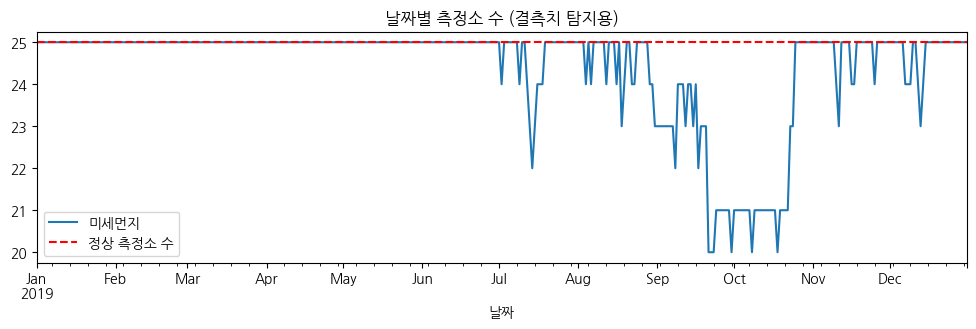

In [ ]:
import matplotlib.pyplot as plt

counts = df[df['Ï∏°Ï†ïÏÜåÎ™Ö'] != 'ÌèâÍ∑†'].groupby('ÎÇ†Ïßú')['ÎØ∏ÏÑ∏Î®ºÏßÄ'].count()
counts.plot(figsize=(12, 3), title='ÎÇ†ÏßúÎ≥Ñ Ï∏°Ï†ïÏÜå Ïàò (Í≤∞Ï∏°Ïπò ÌÉêÏßÄÏö©)')
plt.axhline(25, color='red', linestyle='--', label='Ï†ïÏÉÅ Ï∏°Ï†ïÏÜå Ïàò')
plt.legend()
plt.show()


In [ ]:
# ÏãúÍ∞ÅÌôî Í≤∞Ï∏°Ïπò ÌÉêÏÉâ ÏãúÍ∞ÅÌôî (EDA Heatmap)
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.heatmap(df.pivot_table(index='ÎÇ†Ïßú', columns='Ï∏°Ï†ïÏÜåÎ™Ö', values='ÎØ∏ÏÑ∏Î®ºÏßÄ').isnull(), cbar=False)
plt.title('Ï∏°Ï†ïÏÜåÎ≥Ñ Í≤∞Ï∏°Ïπò Heatmap')

In [ ]:
# ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± Ïõî & ÏöîÏùº
df['Ïõî'] = df['ÎÇ†Ïßú'].dt.month
df['ÏöîÏùº'] = df['ÎÇ†Ïßú'].dt.day_name()


In [ ]:
# EDA ÏõîÎ≥Ñ / ÏöîÏùºÎ≥Ñ Î∂ÑÏÑù(Bar plot)
df_monthly = df.groupby('Ïõî')['ÎØ∏ÏÑ∏Î®ºÏßÄ'].mean()
df_weekday = df.groupby('ÏöîÏùº')['ÎØ∏ÏÑ∏Î®ºÏßÄ'].mean()

df_monthly.plot(kind='bar', title='ÏõîÎ≥Ñ ÌèâÍ∑† ÎØ∏ÏÑ∏Î®ºÏßÄ')
df_weekday.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(kind='bar', title='ÏöîÏùºÎ≥Ñ ÌèâÍ∑† ÎØ∏ÏÑ∏Î®ºÏßÄ')

/tmp/ipykernel_72637/400593245.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df['ÎÇ†Ïßú'], errors='coerce').notnull()]
/tmp/ipykernel_72637/400593245.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.groupby('Ï∏°Ï†ïÏÜåÎ™Ö').apply(lambda g: g.interpolate()).reset_index(drop=True)
/tmp/ipykernel_72637/400593245.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.groupby('Ï∏°Ï†ïÏÜåÎ™Ö').apply(lambda g: g.interpolate()).reset_index(drop=True)
/tmp/ipykernel_72637/400593245.py:15: FutureWarning: DataFrame.interpolate with object dty

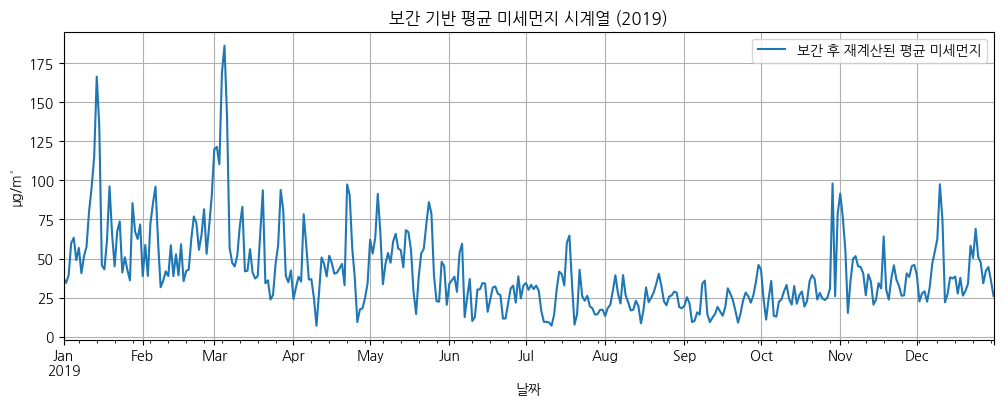

In [ ]:
# 2. ÎÇ†Ïßú ÌååÏã±: format Î™ÖÏãúÌïòÏó¨ Í≤ΩÍ≥† Ï†úÍ±∞
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'], format='%Y-%m-%d', errors='coerce')
df = df[df['ÎÇ†Ïßú'].notnull()]

# 3. 'Ï∏°Ï†ïÏÜåÎ™Ö == ÌèâÍ∑†' Ï†úÍ±∞
df = df[df['Ï∏°Ï†ïÏÜåÎ™Ö'] != 'ÌèâÍ∑†'].copy()

# 4. object ‚Üí numericÏúºÎ°ú ÏûêÎèô Î≥ÄÌôò (Î≥¥Í∞Ñ Í≤ΩÍ≥† Ï†úÍ±∞)
df = df.infer_objects()

# 5. Ï†ïÎ†¨ ÌõÑ Î≥¥Í∞Ñ (group_keys=FalseÎ°ú Ìñ•ÌõÑ Ìò∏ÌôòÏÑ± ÌôïÎ≥¥)
df.sort_values(['Ï∏°Ï†ïÏÜåÎ™Ö', 'ÎÇ†Ïßú'], inplace=True)
df_interpolated = (
    df.groupby('Ï∏°Ï†ïÏÜåÎ™Ö', group_keys=False)
    .apply(lambda g: g.interpolate())
    .reset_index(drop=True)
)

# 6. ÎÇ†ÏßúÎ≥Ñ ÌèâÍ∑† ÏãúÍ≥ÑÏó¥ ÏÉùÏÑ±
pm_series = df_interpolated.groupby('ÎÇ†Ïßú')['ÎØ∏ÏÑ∏Î®ºÏßÄ'].mean()

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))
pm_series.plot(label='Î≥¥Í∞Ñ ÌõÑ Ïû¨Í≥ÑÏÇ∞Îêú ÌèâÍ∑† ÎØ∏ÏÑ∏Î®ºÏßÄ')
plt.title('Î≥¥Í∞Ñ Í∏∞Î∞ò ÌèâÍ∑† ÎØ∏ÏÑ∏Î®ºÏßÄ ÏãúÍ≥ÑÏó¥ (2019)')
plt.ylabel('Œºg/m¬≥')
plt.xlabel('ÎÇ†Ïßú')
plt.grid()
plt.legend()
plt.show()



In [ ]:
# ÎØ∏ÏÑ∏Î®ºÏßÄ Îì±Í∏âÎ≥Ñ ÎπàÎèÑ ÏãúÍ∞ÅÌôî
df_interpolated['Îì±Í∏â'] = df_interpolated['ÎØ∏ÏÑ∏Î®ºÏßÄ'].apply(pm_grade)
df_interpolated['Îì±Í∏â'].value_counts().sort_index().plot(kind='bar', title='ÎØ∏ÏÑ∏Î®ºÏßÄ Îì±Í∏â Î∂ÑÌè¨')
df['Îì±Í∏â'].value_counts().plot(kind='bar', title='ÎØ∏ÏÑ∏Î®ºÏßÄ Îì±Í∏â Î∂ÑÌè¨')


In [ ]:
# Ï∏°Ï†ïÏÜåÎ≥Ñ Î∂ÑÌè¨ ÌôïÏù∏

plt.figure(figsize=(12, 5))
sns.boxplot(x='Ï∏°Ï†ïÏÜåÎ™Ö', y='ÎØ∏ÏÑ∏Î®ºÏßÄ', data=df_interpolated)
plt.xticks(rotation=90)
plt.title('Ï∏°Ï†ïÏÜåÎ≥Ñ ÎØ∏ÏÑ∏Î®ºÏßÄ Î∂ÑÌè¨')


In [ ]:
# Ï†ïÏÉÅÏÑ± ÌôïÏù∏

from statsmodels.tsa.stattools import adfuller

result = adfuller(pm_series)
print("ADF p-value:", result[1])

# ADF p-value: 0.014228288927207528
# ÏàòÏ†ï Ï†ÑÏùò p-value 0.01326704121621125

ADF p-value: 0.014228288927207528


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Î™®Îç∏ ÌïôÏäµ
model = ARIMA(pm_series, order=(1, 1, 1))
model_fit = model.fit()

# 7Ïùº ÏòàÏ∏°
forecast = model_fit.forecast(steps=7)



/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Îì±Í∏â Î∂ÑÎ•ò Ìï®Ïàò
def pm_grade(value):
    if value <= 15:
        return 'Îß§Ïö∞ Ï¢ãÏùå'
    elif value <= 30:
        return 'Ï¢ãÏùå'
    elif value <= 80:
        return 'Î≥¥ÌÜµ'
    elif value <= 150:
        return 'ÎÇòÏÅ®'
    else:
        return 'Îß§Ïö∞ ÎÇòÏÅ®'

# ÏòàÏ∏°Í∞í Îì±Í∏âÌôî
forecast_grades = forecast.apply(pm_grade)

# DataFrame ÏÉùÏÑ±
forecast_df = pd.DataFrame({
    'ÏòàÏ∏°Í∞í': forecast,
    'Îì±Í∏â': forecast_grades
})



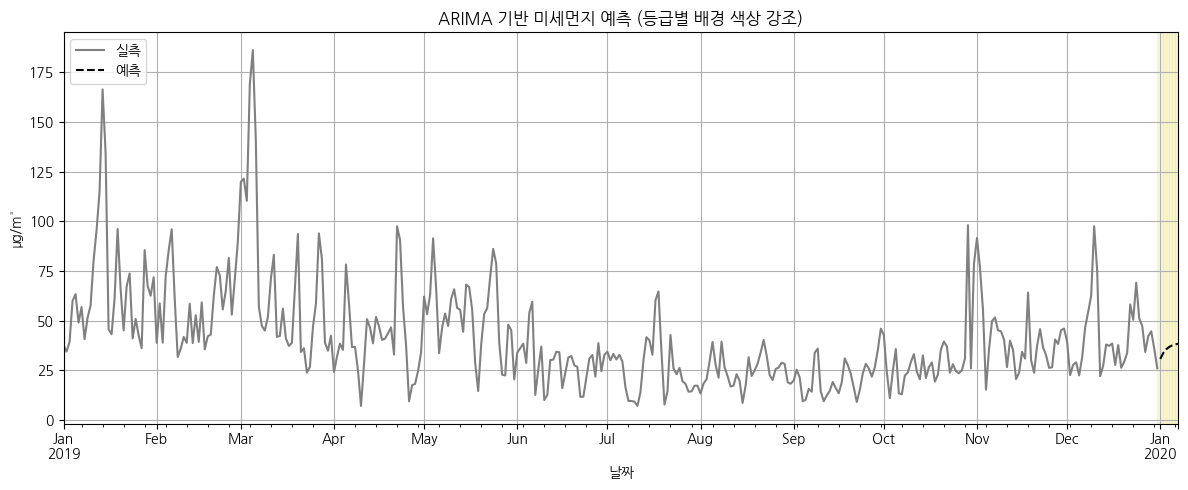

In [ ]:
# 1. Î∞∞Í≤Ω ÏÉâÏÉÅ Ï†ïÏùò (Ïù¥Í±∏ ÏûäÏúºÎ©¥ Ïò§Î•ò Î∞úÏÉù)
grade_bg_colors = {
    'Îß§Ïö∞ Ï¢ãÏùå': 'darkgreen',
    'Ï¢ãÏùå': 'lightgreen',
    'Î≥¥ÌÜµ': 'khaki',
    'ÎÇòÏÅ®': 'orange',
    'Îß§Ïö∞ ÎÇòÏÅ®': 'red'
}

# 2. ÏãúÍ∞ÅÌôî ÏΩîÎìú (axvspan ÌôúÏö©)
from datetime import timedelta
plt.figure(figsize=(12, 5))
pm_series.plot(label='Ïã§Ï∏°', color='gray')
forecast.plot(label='ÏòàÏ∏°', color='black', linestyle='--')

for date, grade in zip(forecast_df.index, forecast_df['Îì±Í∏â']):
    plt.axvspan(
        date - timedelta(hours=12),
        date + timedelta(hours=12),
        color=grade_bg_colors.get(grade, 'white'),  # ÏïàÏ†ÑÌïòÍ≤å getÏúºÎ°ú Ï≤òÎ¶¨
        alpha=0.3
    )

plt.title('ARIMA Í∏∞Î∞ò ÎØ∏ÏÑ∏Î®ºÏßÄ ÏòàÏ∏° (Îì±Í∏âÎ≥Ñ Î∞∞Í≤Ω ÏÉâÏÉÅ Í∞ïÏ°∞)')
plt.ylabel('Œºg/m¬≥')
plt.xlabel('ÎÇ†Ïßú')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 1. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Ï†ÑÏ≤¥ - 7Ïùº)
train = pm_series[:-7]
test = pm_series[-7:]

# 2. Î™®Îç∏ Ï†ÅÌï©
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# 3. ÏòàÏ∏°
pred = model_fit.forecast(steps=7)

# 4. ÌèâÍ∞Ä ÏßÄÌëú
rmse = np.sqrt(mean_squared_error(test, pred))
mae = mean_absolute_error(test, pred)

print(f"Î™®Îç∏ ÏÑ±Îä• (Test Set)")
print(f"üìâ RMSE: {rmse:.2f}")
print(f"üìâ MAE : {mae:.2f}")


Î™®Îç∏ ÏÑ±Îä• (Test Set)
üìâ RMSE: 9.68
üìâ MAE : 8.03


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
